## Define Project

This project is from a Kaggle challenge called [Playground Series - Season 4, Episode 1](https://www.kaggle.com/competitions/playground-series-s4e1). 

The goal is to predict if a customer will leave a bank or not. This is called customer churn. We are given a dataset with information about each customer, like their credit score, age,country, gender, how long they’ve been with the bank, and their account details. The column we want to predict is called `Exited`. It shows 1 if the customer left, and 0 if they stayed. We will train a machine learning model using this data and then make predictions for new customers. The final answers will be submitted in a file, and Kaggle will check how accurate our predictions are.




## Data Loading and Initial Look

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Print the shape of the datasets
print(f"Train data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

# Show the first few rows of the training data
train.head()




Train data shape: (165034, 14)
Test data shape: (110023, 13)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Data Visualization

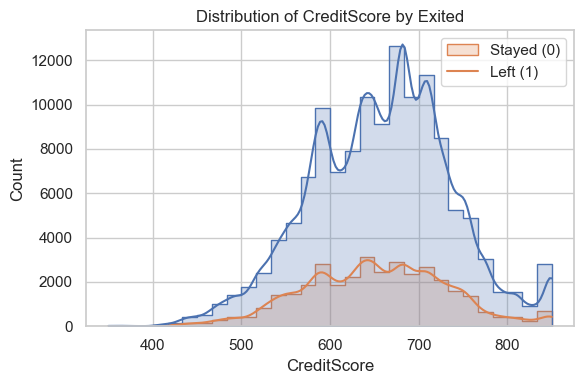

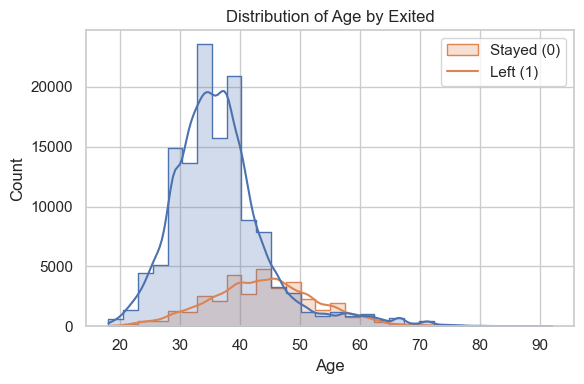

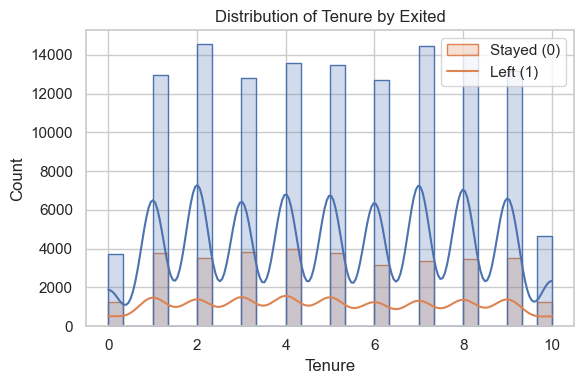

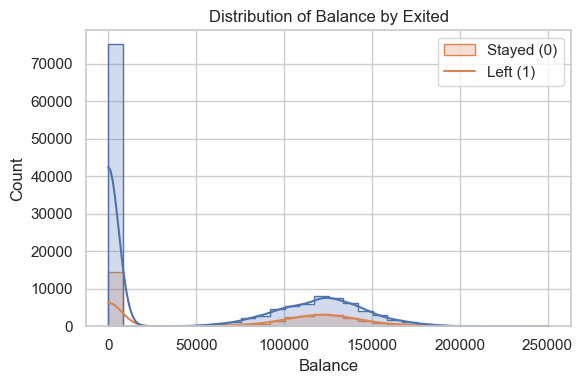

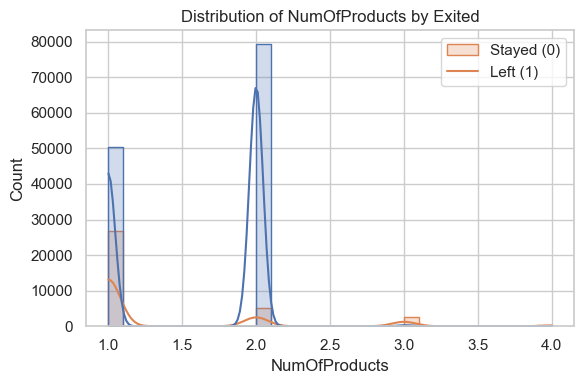

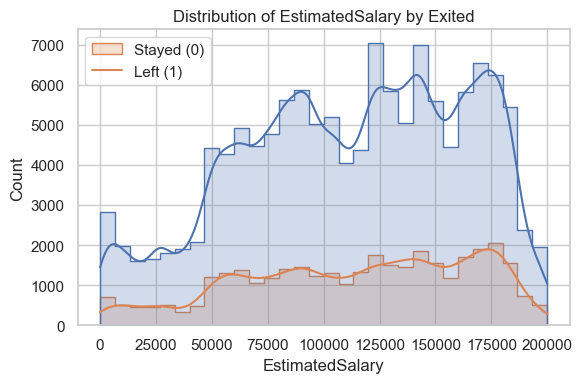

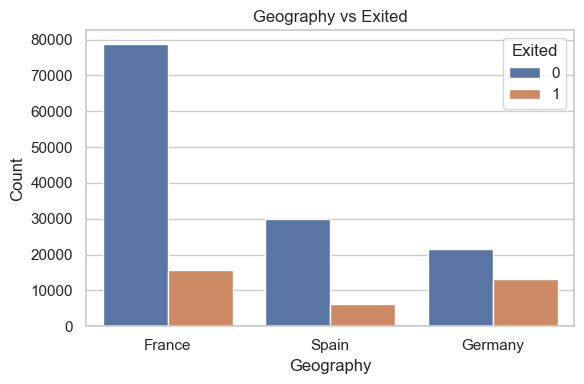

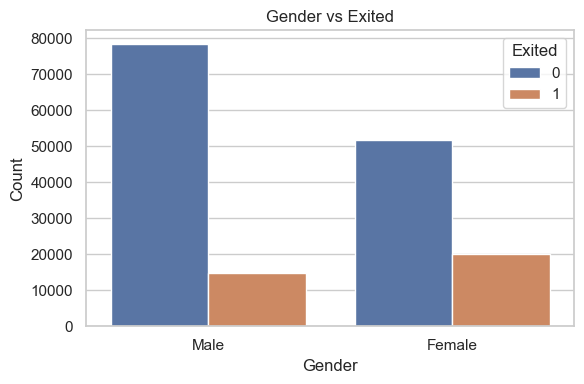

### Comments on Features:

- Age: Older customers are more likely to leave. This is a strong feature.
- NumOfProducts: Customers with only 1 product tend to leave more often.
- Geography: More churn is seen in customers from Germany.
- Balance: Some customers with higher balance seem to leave more.
- Gender and CreditScore: These show smaller differences between classes.
- EstimatedSalary: No clear pattern — may not be very useful alone.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Numerical features to compare
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=train, x=feature, hue='Exited', kde=True, bins=30, element='step')
    plt.title(f'Distribution of {feature} by Exited')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Stayed (0)', 'Left (1)'])
    plt.tight_layout()
    plt.show()

# Categorical features to compare
categorical_features = ['Geography', 'Gender']

# Plot count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train, x=feature, hue='Exited')
    plt.title(f'{feature} vs Exited')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Comments on what looks useful
print("### Comments on Features:\n")
print("- Age: Older customers are more likely to leave. This is a strong feature.")
print("- NumOfProducts: Customers with only 1 product tend to leave more often.")
print("- Geography: More churn is seen in customers from Germany.")
print("- Balance: Some customers with higher balance seem to leave more.")
print("- Gender and CreditScore: These show smaller differences between classes.")
print("- EstimatedSalary: No clear pattern — may not be very useful alone.")


## Data Cleaning and Preperation for Machine Learning

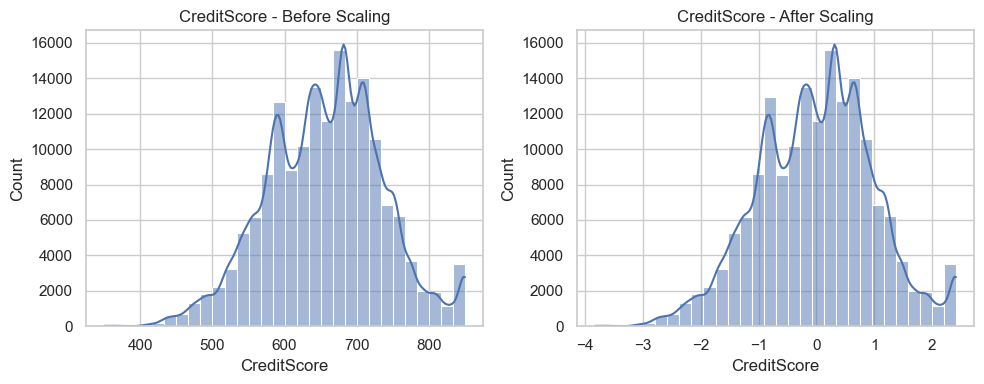

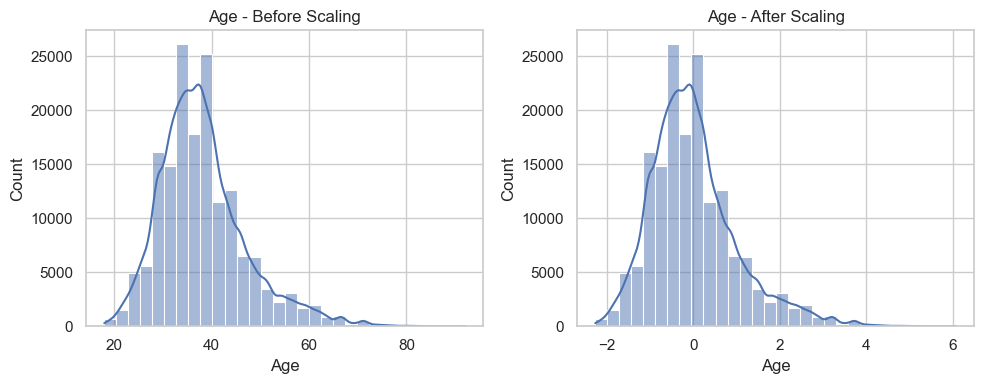

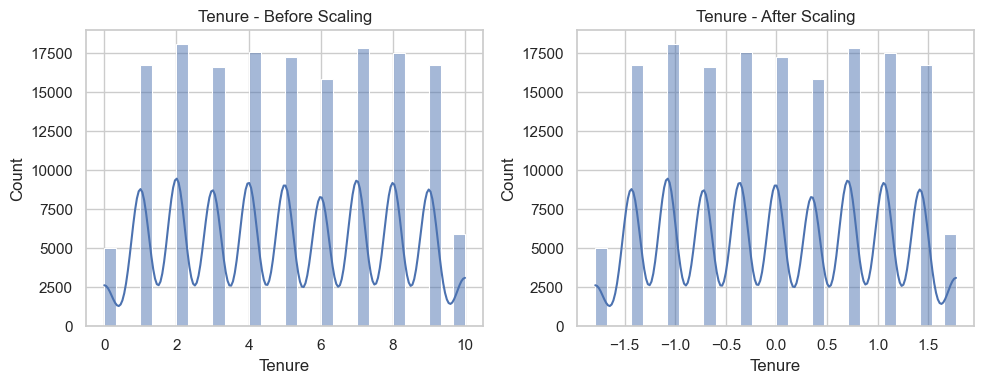

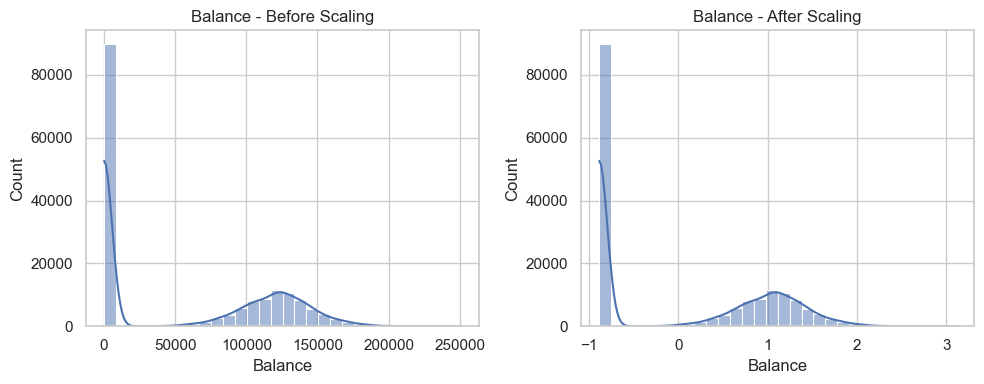

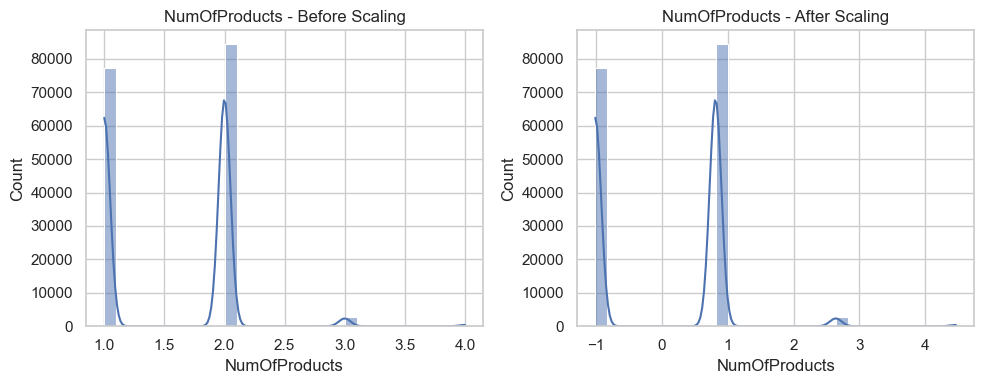

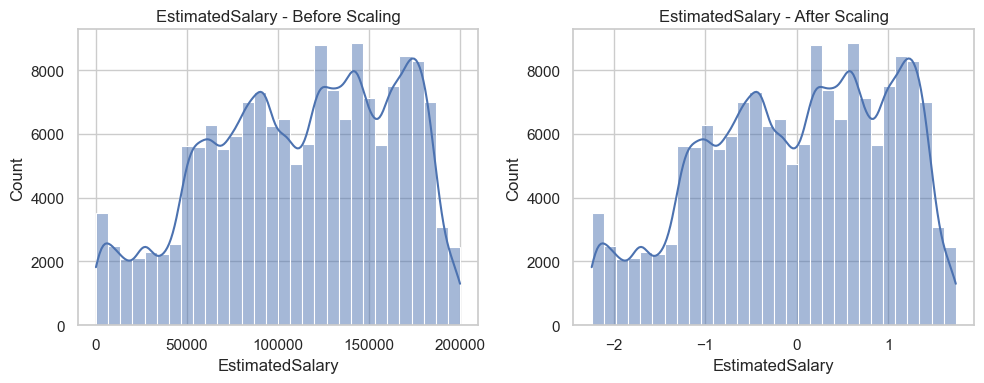

In [20]:
# Import required libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Drop ID columns and names that don't help prediction
train_clean = train.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_clean = test.drop(['id', 'CustomerId', 'Surname'], axis=1)

# 2. One-hot encode categorical columns (Gender and Geography)
train_clean = pd.get_dummies(train_clean, columns=['Geography', 'Gender'], drop_first=True)
test_clean = pd.get_dummies(test_clean, columns=['Geography', 'Gender'], drop_first=True)

# 3. Make sure test has all the same columns as train (except target)
missing_cols = set(train_clean.columns) - set(test_clean.columns) - {'Exited'}
for col in missing_cols:
    test_clean[col] = 0

# 4. Rescale numerical features using StandardScaler
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Save original data for comparison
original_train = train_clean[features_to_scale].copy()

# Scale features
scaler = StandardScaler()
train_clean[features_to_scale] = scaler.fit_transform(train_clean[features_to_scale])
test_clean[features_to_scale] = scaler.transform(test_clean[features_to_scale])

# 5. Plot before and after scaling for each feature
for feature in features_to_scale:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(original_train[feature], ax=axes[0], bins=30, kde=True)
    axes[0].set_title(f"{feature} - Before Scaling")
    sns.histplot(train_clean[feature], ax=axes[1], bins=30, kde=True)
    axes[1].set_title(f"{feature} - After Scaling")
    plt.tight_layout()
    plt.show()


## Machine Learning

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare data
X = train_clean.drop('Exited', axis=1)
y = train_clean['Exited']

# Split into train, validation, and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on final test set
y_test_pred = model.predict(X_test)
print("Hold-out Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Predict on Kaggle test set
challenge_preds = model.predict(test_clean)



Validation Accuracy: 0.8590991718844678

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     19517
           1       0.73      0.54      0.62      5238

    accuracy                           0.86     24755
   macro avg       0.81      0.74      0.77     24755
weighted avg       0.85      0.86      0.85     24755

Hold-out Test Accuracy: 0.8572063338180643
